### Importing important libraries

In [1]:
import tarfile

In [2]:
#important libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,BatchNormalization,Dropout,MaxPooling2D
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extracting Data from tar files

In [4]:
my_tar = tarfile.open(r"/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3/images_train.tar")
my_tar.extractall('./') # specify which folder to extract to
my_tar.close()

In [ ]:
##########################
###########################
###########################

In [5]:
import os
import tarfile

# Define the absolute path of the tar file
tar_file_path = r"/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3/images_train.tar"

# Extract the folder name from the tar file path
relative_path = os.path.basename(tar_file_path).split('.')[0]

# Create the target directory path
full_path_train = os.path.join('.', relative_path)

# Extract the tar file
with tarfile.open(tar_file_path, 'r') as my_tar:
    my_tar.extractall(full_path_train)

# List the contents of the extracted directory
images_links = sorted(os.listdir(full_path_train))
print(images_links)


['00001_blue.png', '00001_red.png', '00001_yellow.png', '00002_blue.png', '00002_red.png', '00002_yellow.png', '00003_blue.png', '00003_red.png', '00003_yellow.png', '00004_blue.png', '00004_red.png', '00004_yellow.png', '00005_blue.png', '00005_red.png', '00005_yellow.png', '00006_blue.png', '00006_red.png', '00006_yellow.png', '00007_blue.png', '00007_red.png', '00007_yellow.png', '00008_blue.png', '00008_red.png', '00008_yellow.png', '00009_blue.png', '00009_red.png', '00009_yellow.png', '00010_blue.png', '00010_red.png', '00010_yellow.png', '00011_blue.png', '00011_red.png', '00011_yellow.png', '00012_blue.png', '00012_red.png', '00012_yellow.png', '00013_blue.png', '00013_red.png', '00013_yellow.png', '00014_blue.png', '00014_red.png', '00014_yellow.png', '00015_blue.png', '00015_red.png', '00015_yellow.png', '00016_blue.png', '00016_red.png', '00016_yellow.png', '00017_blue.png', '00017_red.png', '00017_yellow.png', '00018_blue.png', '00018_red.png', '00018_yellow.png', '00019_bl

In [6]:
print(relative_path)

images_train


In [7]:
images_links[0:3]

['00001_blue.png', '00001_red.png', '00001_yellow.png']

In [8]:
images= [images_links[i:i+3] for i in range (0,len(images_links),3)]
# for i in images:
#     i[0],i[1],i[2]=i[1],i[2],i[0]

In [9]:
images = images[:-1]

In [10]:
len(images)

9632

In [11]:
images[-1]

['09632_blue.png', '09632_red.png', '09632_yellow.png']

In [12]:
labels=pd.read_csv("/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3/y_train.csv",encoding="utf-8",index_col="file_id")

In [13]:
labels.tail(20)

,cell_line
file_id,
9613,HeLa
9614,HEK 293
9615,RT4
9616,HEK 293
9617,RT4
9618,RT4
9619,CACO-2
9620,CACO-2
9621,HEK 293


In [14]:
labels.shape

(9632, 1)

In [15]:
labels["images"]=images

In [16]:
labels

,cell_line,images
file_id,,
1,MCF7,"[00001_blue.png, 00001_red.png, 00001_yellow.png]"
2,RT4,"[00002_blue.png, 00002_red.png, 00002_yellow.png]"
3,U-2 OS,"[00003_blue.png, 00003_red.png, 00003_yellow.png]"
4,RT4,"[00004_blue.png, 00004_red.png, 00004_yellow.png]"
5,A549,"[00005_blue.png, 00005_red.png, 00005_yellow.png]"
...,...,...
9628,PC-3,"[09628_blue.png, 09628_red.png, 09628_yellow.png]"
9629,HEK 293,"[09629_blue.png, 09629_red.png, 09629_yellow.png]"
9630,RT4,"[09630_blue.png, 09630_red.png, 09630_yellow.png]"


In [17]:
train_data=labels.copy()

In [18]:
train_data

,cell_line,images
file_id,,
1,MCF7,"[00001_blue.png, 00001_red.png, 00001_yellow.png]"
2,RT4,"[00002_blue.png, 00002_red.png, 00002_yellow.png]"
3,U-2 OS,"[00003_blue.png, 00003_red.png, 00003_yellow.png]"
4,RT4,"[00004_blue.png, 00004_red.png, 00004_yellow.png]"
5,A549,"[00005_blue.png, 00005_red.png, 00005_yellow.png]"
...,...,...
9628,PC-3,"[09628_blue.png, 09628_red.png, 09628_yellow.png]"
9629,HEK 293,"[09629_blue.png, 09629_red.png, 09629_yellow.png]"
9630,RT4,"[09630_blue.png, 09630_red.png, 09630_yellow.png]"


In [19]:
lables=zip(train_data["cell_line"].value_counts().index,[i for i in range (len(train_data["cell_line"].value_counts().index))])

In [20]:
lables=dict(lables)

In [21]:
lables

{'RT4': 0,
 'CACO-2': 1,
 'HEK 293': 2,
 'MCF7': 3,
 'U-2 OS': 4,
 'U-251 MG': 5,
 'PC-3': 6,
 'HeLa': 7,
 'A549': 8}

In [22]:
train_data["labels"]=train_data["cell_line"].map(lables)

In [23]:
train_data[20:45]

,cell_line,images,labels
file_id,,,
21,CACO-2,"[00021_blue.png, 00021_red.png, 00021_yellow.png]",1
22,MCF7,"[00022_blue.png, 00022_red.png, 00022_yellow.png]",3
23,CACO-2,"[00023_blue.png, 00023_red.png, 00023_yellow.png]",1
24,RT4,"[00024_blue.png, 00024_red.png, 00024_yellow.png]",0
25,RT4,"[00025_blue.png, 00025_red.png, 00025_yellow.png]",0
26,HEK 293,"[00026_blue.png, 00026_red.png, 00026_yellow.png]",2
27,PC-3,"[00027_blue.png, 00027_red.png, 00027_yellow.png]",6
28,HeLa,"[00028_blue.png, 00028_red.png, 00028_yellow.png]",7
29,HEK 293,"[00029_blue.png, 00029_red.png, 00029_yellow.png]",2


In [24]:
x_train,x_test,y_train,y_test=train_test_split(train_data["images"],train_data["labels"],train_size=0.8,random_state=22,shuffle=True)

In [25]:
x_test

file_id
5627    [05627_blue.png, 05627_red.png, 05627_yellow.png]
352     [00352_blue.png, 00352_red.png, 00352_yellow.png]
3200    [03200_blue.png, 03200_red.png, 03200_yellow.png]
5886    [05886_blue.png, 05886_red.png, 05886_yellow.png]
3891    [03891_blue.png, 03891_red.png, 03891_yellow.png]
                              ...                        
6106    [06106_blue.png, 06106_red.png, 06106_yellow.png]
8969    [08969_blue.png, 08969_red.png, 08969_yellow.png]
8486    [08486_blue.png, 08486_red.png, 08486_yellow.png]
2166    [02166_blue.png, 02166_red.png, 02166_yellow.png]
3803    [03803_blue.png, 03803_red.png, 03803_yellow.png]
Name: images, Length: 1927, dtype: object

### Preprocessing training data

In [26]:
train=[]
for n,i in enumerate(x_train ):
    image=np.zeros(shape=(64,64,3))
    for j,k in enumerate(i):
        img1 = cv2.imread(os.path.join(full_path_train,k))

        gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

        #print(channel.shape)
        image[:,:,j] =gray
    image=cv2.fastNlMeansDenoising(np.uint8(image), None, h=5, searchWindowSize=15, templateWindowSize=5)
    #print (f"progress is :{((n+1)/len(x_train))*100}%")
#     image[:,:,1]=(image[:,:,1]+image[:,:,2])/2
    train.append(image)

In [27]:
np.array(train).max()

255

In [28]:
train[0].shape

(64, 64, 3)

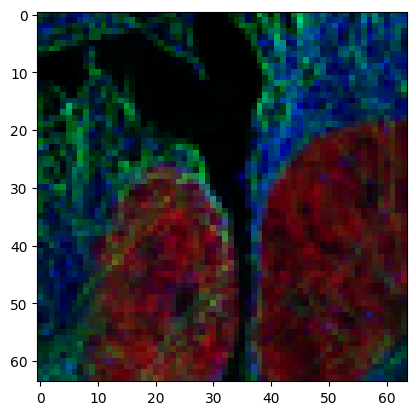

In [29]:
plt.imshow(train[0])

In [30]:
X_train=train
Y_train=y_train.values.tolist()

In [31]:
type(X_train)

list

In [32]:
X_train

[array([[[ 24,  60,  42],
         [  4,  45,  64],
         [  1,  25,  35],
         ...,
         [  0,  79, 105],
         [  0,  62,  89],
         [  0,  33, 128]],
 
        [[  1,  49,  43],
         [  0,  20,  40],
         [  0,  11,  40],
         ...,
         [  0,  54, 131],
         [  0,  61, 134],
         [  0,  50, 133]],
 
        [[  1,  12, 110],
         [  0,   8, 118],
         [  0,  16,  83],
         ...,
         [  0,  54,  84],
         [  0,  85, 104],
         [  0,  75,  98]],
 
        ...,
 
        [[  0,  54,  35],
         [  0,  69,  70],
         [  0,  69,  62],
         ...,
         [  0,  56,  54],
         [  0,  35,  70],
         [  0,  30,  58]],
 
        [[  0,  82,  59],
         [  0,  61,  68],
         [  0,  94,  48],
         ...,
         [  0,  41,  40],
         [  0,  26,  63],
         [  0,  25,  44]],
 
        [[  0,  68,  80],
         [  0, 100,  82],
         [  0,  54,  57],
         ...,
         [  0,  42,  56],
  

In [33]:
type(y_train)

pandas.core.series.Series

In [34]:
type(Y_train)

list

In [35]:
y_train

file_id
7461    7
2846    5
9039    7
4470    0
6929    0
       ..
4588    7
6647    2
5479    6
8549    0
6277    4
Name: labels, Length: 7705, dtype: int64

In [36]:
x_train=np.array(train)
x_train.shape

(7705, 64, 64, 3)

In [37]:
y_train=to_categorical(y_train)

In [38]:
y_train.shape

(7705, 9)

In [39]:
type(y_train)

numpy.ndarray

### Training Data augmentating using colorjitter

In [40]:
import torchvision.transforms as transforms

#Assuming x_train is a list of PIL images and y_train is a list of corresponding labels
#Define the random color transformation
color_jitter = transforms.ColorJitter(
    brightness=0.4,
    contrast=0.4,
    saturation=0.4,
    hue=0.1
)
random_color = transforms.RandomApply([color_jitter], p=0.5)

#Select the labels to apply augmentation
selected_labels = [i for i in range(4,9)]

#Apply random color augmentation to x_train for selected labels
for image, label in zip(X_train[:], Y_train[:]):
    if label in selected_labels:
        augmented_image = random_color(Image.fromarray(np.uint8(image)))
        X_train.append(np.array(augmented_image))
        Y_train.append(label)

In [83]:
len(X_train)

10432

#Another augmentation method

In [ ]:
###########
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal_and_vertical"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomCrop(64, 64),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
    preprocessing.RandomContrast(factor=0.2),
    # preprocessing.RandomBrightness(factor=0.2),  # You can add this back if needed
    preprocessing.Rescaling(1.0 / 255)
])

# Augment X_train and Y_train
x_train_augmented = []
y_train_augmented = []

for image, label in zip(X_train, Y_train):
    if label in range(4, 10):  # Labels 4 to 9
        num_augmentations = 6
    else:
        num_augmentations = 2

    augmented_images = []
    for _ in range(num_augmentations):
        augmented_image = data_augmentation(image.reshape(1, 64, 64, 3))
        augmented_images.append(augmented_image.numpy()[0])
        y_train_augmented.append(label)
    x_train_augmented.extend(augmented_images)

# Convert the augmented images and labels to numpy arrays
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Append augmented data to the main X_train and Y_train
X_train = np.concatenate((X_train, x_train_augmented), axis=0)
Y_train = np.concatenate((Y_train, y_train_augmented), axis=0)



# Validation Data preprocessing

In [42]:
test=[]
for n,i in enumerate(x_test ):
    image=np.zeros(shape=(64,64,3))
    for j,k in enumerate(i):
        img1 = cv2.imread(os.path.join(full_path_train,k))

        gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

        #print(channel.shape)
        image[:,:,j] =gray
    image=cv2.fastNlMeansDenoising(np.uint8(image), None, h=5, searchWindowSize=15, templateWindowSize=5)
    print (f"progress is :{((n+1)/len(x_test))*100}%")
#     image[:,:,1]=(image[:,:,1]+image[:,:,2])/2
    test.append(image)

progress is :0.05189413596263622%
progress is :0.10378827192527244%
progress is :0.15568240788790866%
progress is :0.2075765438505449%
progress is :0.2594706798131811%
progress is :0.3113648157758173%
progress is :0.3632589517384536%
progress is :0.4151530877010898%
progress is :0.46704722366372603%
progress is :0.5189413596263622%
progress is :0.5708354955889984%
progress is :0.6227296315516346%
progress is :0.6746237675142709%
progress is :0.7265179034769071%
progress is :0.7784120394395433%
progress is :0.8303061754021795%
progress is :0.8822003113648157%
progress is :0.9340944473274521%
progress is :0.9859885832900882%
progress is :1.0378827192527245%
progress is :1.0897768552153606%
progress is :1.1416709911779968%
progress is :1.1935651271406331%
progress is :1.2454592631032693%
progress is :1.2973533990659056%
progress is :1.3492475350285418%
progress is :1.401141670991178%
progress is :1.4530358069538143%
progress is :1.5049299429164504%
progress is :1.5568240788790866%
progres

In [43]:
x_test=np.array(test)/255

In [44]:
len(X_train)+len(x_test)

12359

In [45]:
x_test.shape

(1927, 64, 64, 3)

In [46]:
y_test=to_categorical(y_test)

In [47]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# [type(i) for i in X_train]

In [48]:
x_train=(np.array(X_train))/255
y_train=to_categorical(Y_train)

In [49]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Data augmentation using keras layers

In [56]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
#from tensorflow.keras import layers
#import tensorflow as tf

# Define data augmentation pipeline
#data_augmentation = tf.keras.Sequential([
#    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#    layers.experimental.preprocessing.RandomRotation(0.2),
#    layers.experimental.preprocessing.RandomCrop(64, 64),  # Adding RandomCrop
#    layers.experimental.preprocessing.RandomZoom(0.2),  # Adding RandomZoom
#])



# Biulding model with Keras

In [57]:
model = Sequential([
    data_augmentation,
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

optimizer = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.build(input_shape=(None, 64, 64, 3))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 batch_normalization_4 (Batc  (None, 29, 29, 32)      

In [ ]:
from keras.callbacks import Callback

class AccuracyStopping(Callback):
    def __init__(self, monitor='val_accuracy', value=0.85, verbose=0):
        super(AccuracyStopping, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        val_accuracy = logs.get(self.monitor)
        if val_accuracy is not None and val_accuracy >= self.value:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f"\nReached {self.value} validation accuracy, stopping training...")

callback = AccuracyStopping(monitor='val_accuracy', value=0.85, verbose=0)





# Train the model
hist3=model.fit(X_train,Y_train, validation_data=(x_test,y_test), epochs=200, batch_size=64, callbacks=callback)

In [58]:
from keras.callbacks import Callback

class AccuracyStopping(Callback):
    def __init__(self, monitor='val_accuracy', value=0.85, verbose=0):
        super(AccuracyStopping, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        val_accuracy = logs.get(self.monitor)
        if val_accuracy is not None and val_accuracy >= self.value:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f"\nReached {self.value} validation accuracy, stopping training...")

callback = AccuracyStopping(monitor='val_accuracy', value=0.85, verbose=0)





# Train the model
hist3=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=200, batch_size=64, callbacks=callback)

Epoch 1/200
  4/163 [..............................] - ETA: 2s - loss: 3.1302 - accuracy: 0.1055  

163/163 [==============================] - 6s 18ms/step - loss: 2.1665 - accuracy: 0.1859 - val_loss: 2.0553 - val_accuracy: 0.2185
Epoch 2/200
163/163 [==============================] - 3s 16ms/step - loss: 1.9136 - accuracy: 0.2723 - val_loss: 1.9644 - val_accuracy: 0.2719
Epoch 3/200
163/163 [==============================] - 3s 16ms/step - loss: 1.7914 - accuracy: 0.3110 - val_loss: 1.7234 - val_accuracy: 0.3389
Epoch 4/200
163/163 [==============================] - 3s 16ms/step - loss: 1.7000 - accuracy: 0.3512 - val_loss: 1.5243 - val_accuracy: 0.4203
Epoch 5/200
163/163 [==============================] - 3s 17ms/step - loss: 1.6033 - accuracy: 0.3975 - val_loss: 1.4953 - val_accuracy: 0.4504
Epoch 6/200
163/163 [==============================] - 3s 16ms/step - loss: 1.5227 - accuracy: 0.4361 - val_loss: 1.3225 - val_accuracy: 0.5080
Epoch 7/200
163/163 [==============================] - 3s 16ms/step - loss: 1.4495 - accuracy: 0.4560 - val_loss: 1.3306 - val_accuracy: 0.5127
Epoc

In [77]:
y=model.predict(x_test)
y_pred=[np.argmax(vec) for vec in y ]
y_t= [np.argmax(vec) for vec in y_test]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_t)
print(accuracy)

61/61 [==============================] - 0s 7ms/step
0.8313025428126622


# Biulding model with ConvNext

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import ConvNeXtLarge
from tensorflow.keras.callbacks import Callback, EarlyStopping



# Load the ConvNeXtLarge model with pre-trained weights
base_model = ConvNeXtLarge(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classifier on top of the base model
name = "ConvNeXtLarge"
model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(9, activation='softmax')
], name=name)

# Set the learning rate scheduler
initial_learning_rate = 5e-5
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

# Compile the model
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-8)
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

# Build the model by calling it on a batch of data
model.build(input_shape=(None, 64, 64, 3))

# Print a summary of the model architecture
model.summary()

In [68]:
from keras.callbacks import Callback

class AccuracyStopping(Callback):
    def __init__(self, monitor='val_accuracy', value=0.87, verbose=0):
        super(AccuracyStopping, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        val_accuracy = logs.get(self.monitor)
        if val_accuracy is not None and val_accuracy >= self.value:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f"\nReached {self.value} validation accuracy, stopping training...")

callback = AccuracyStopping(monitor='val_accuracy', value=0.87, verbose=0)





# Train the model
hist3=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=400, batch_size=64, callbacks=callback)

Epoch 1/400
  4/163 [..............................] - ETA: 2s - loss: 0.3186 - accuracy: 0.8906

163/163 [==============================] - 3s 17ms/step - loss: 0.2717 - accuracy: 0.9129 - val_loss: 0.8859 - val_accuracy: 0.7815
Epoch 2/400
163/163 [==============================] - 3s 16ms/step - loss: 0.2761 - accuracy: 0.9109 - val_loss: 0.5604 - val_accuracy: 0.8365
Epoch 3/400
163/163 [==============================] - 3s 18ms/step - loss: 0.2722 - accuracy: 0.9130 - val_loss: 0.5432 - val_accuracy: 0.8428
Epoch 4/400
163/163 [==============================] - 3s 15ms/step - loss: 0.2834 - accuracy: 0.9128 - val_loss: 0.8059 - val_accuracy: 0.7950
Epoch 5/400
163/163 [==============================] - 2s 15ms/step - loss: 0.2625 - accuracy: 0.9163 - val_loss: 0.5750 - val_accuracy: 0.8308
Epoch 6/400
163/163 [==============================] - 2s 15ms/step - loss: 0.2758 - accuracy: 0.9147 - val_loss: 0.5665 - val_accuracy: 0.8422
Epoch 7/400
163/163 [==============================] - 3s 16ms/step - loss: 0.2695 - accuracy: 0.9126 - val_loss: 0.5008 - val_accuracy: 0.8547
Epoc

In [71]:
y=model.predict(x_test)
y_pred=[np.argmax(vec) for vec in y ]
y_t= [np.argmax(vec) for vec in y_test]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_t)
print(accuracy)

61/61 [==============================] - 0s 7ms/step
0.8713025428126622


#Building ResNet model

In [80]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import Callback, EarlyStopping
import tensorflow as tf

# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
# Create a new model on top of the ResNet50 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_28 (Dense)            (None, 128)               262272    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                      

In [ ]:
# Define callbacks
class AccuracyStopping(Callback):
    def __init__(self, monitor='val_accuracy', value=0.9, verbose=1):
        super(AccuracyStopping, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        val_accuracy = logs.get(self.monitor)
        if val_accuracy is not None and val_accuracy >= self.value:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f"\nReached {self.value} validation accuracy, stopping training...")

accuracy_callback = AccuracyStopping(monitor='val_accuracy', value=0.9, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
hist3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size=64, callbacks=[accuracy_callback, early_stopping])

In [79]:
y=model.predict(x_test)
y_pred=[np.argmax(vec) for vec in y ]
y_t= [np.argmax(vec) for vec in y_test]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_t)
print(accuracy)

61/61 [==============================] - 0s 3ms/step
0.8900259470679813


In [81]:
my_tar = tarfile.open(r"/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3/images_test.tar")
my_tar.extractall('./') # specify which folder to extract to
my_tar.close()

In [ ]:
import os
import tarfile

# Define the absolute path of the tar file
tar_file_path_test= r"/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3/images_test.tar"

# Extract the folder name from the tar file path
relative_path_test = os.path.basename(tar_file_path_test).split('.')[0]

# Create the target directory path
full_path= os.path.join('.', relative_path_test)

# Extract the tar file
with tarfile.open(tar_file_path_test, 'r') as my_tar:
    my_tar.extractall(full_path)

# List the contents of the extracted directory
images_test_links=sorted(os.listdir(full_path))
print(images_test_links)

['09633_blue.png', '09633_red.png', '09633_yellow.png', '09634_blue.png', '09634_red.png', '09634_yellow.png', '09635_blue.png', '09635_red.png', '09635_yellow.png', '09636_blue.png', '09636_red.png', '09636_yellow.png', '09637_blue.png', '09637_red.png', '09637_yellow.png', '09638_blue.png', '09638_red.png', '09638_yellow.png', '09639_blue.png', '09639_red.png', '09639_yellow.png', '09640_blue.png', '09640_red.png', '09640_yellow.png', '09641_blue.png', '09641_red.png', '09641_yellow.png', '09642_blue.png', '09642_red.png', '09642_yellow.png', '09643_blue.png', '09643_red.png', '09643_yellow.png', '09644_blue.png', '09644_red.png', '09644_yellow.png', '09645_blue.png', '09645_red.png', '09645_yellow.png', '09646_blue.png', '09646_red.png', '09646_yellow.png', '09647_blue.png', '09647_red.png', '09647_yellow.png', '09648_blue.png', '09648_red.png', '09648_yellow.png', '09649_blue.png', '09649_red.png', '09649_yellow.png', '09650_blue.png', '09650_red.png', '09650_yellow.png', '09651_bl

In [ ]:
print(full_path)

./images_test


In [ ]:
################
absolute_path_test = "/kaggle/input/challenge3cells/images_test"
print(absolute_path_test)
relative_path_test = "images_test"
full_path = os.path.join(absolute_path_test, relative_path_test)
images_test_links=sorted(os.listdir(full_path))

/kaggle/input/challenge3cells/images_test


In [ ]:
images_test= [images_test_links[i:i+3] for i in range (0,len(images_test_links),3)]

In [ ]:
len(images_test)

6870

In [ ]:
images_test[-1]

['images_test']

### test Data preprocessing and applying model on it


In [ ]:
test_1 = []

for n, i in enumerate(images_test):
    image = np.zeros(shape=(64, 64, 3))
    for j, k in enumerate(i):
        img_path = os.path.join(full_path, k)
        print("Processing image:", img_path)  # Debugging print

        try:
            img1 = cv2.imread(img_path)
            if img1 is None:
                print("Image not loaded:", img_path)  # Debugging print
                continue

            gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
            image[:, :, j] = gray

        except Exception as e:
            print("Error processing image:", img_path)
            print("Error details:", str(e))

    image = cv2.fastNlMeansDenoising(np.uint8(image), None, h=5, searchWindowSize=15, templateWindowSize=5)
    test_1.append(image)



Streaming output truncated to the last 5000 lines.
Processing image: ./images_test/14836_blue.png
Processing image: ./images_test/14836_red.png
Processing image: ./images_test/14836_yellow.png
Processing image: ./images_test/14837_blue.png
Processing image: ./images_test/14837_red.png
Processing image: ./images_test/14837_yellow.png
Processing image: ./images_test/14838_blue.png
Processing image: ./images_test/14838_red.png
Processing image: ./images_test/14838_yellow.png
Processing image: ./images_test/14839_blue.png
Processing image: ./images_test/14839_red.png
Processing image: ./images_test/14839_yellow.png
Processing image: ./images_test/14840_blue.png
Processing image: ./images_test/14840_red.png
Processing image: ./images_test/14840_yellow.png
Processing image: ./images_test/14841_blue.png
Processing image: ./images_test/14841_red.png
Processing image: ./images_test/14841_yellow.png
Processing image: ./images_test/14842_blue.png
Processing image: ./images_test/14842_red.png
Proc

In [ ]:
test_1=[]
for n,i in enumerate(images_test ):
    image=np.zeros(shape=(64,64,3))
    for j,k in enumerate(i):
        print(os.path.join(full_path,k))
        img1 = cv2.imread(os.path.join(full_path,k))

        gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

        #print(channel.shape)
        image[:,:,j] =gray
    image=cv2.fastNlMeansDenoising(np.uint8(image), None, h=5, searchWindowSize=15, templateWindowSize=5)
    #print (f"progress is :{((n+1)/len(x_train))*100}%")
#     image[:,:,1]=(image[:,:,1]+image[:,:,2])/2
    test_1.append(image)

Streaming output truncated to the last 5000 lines.
./images_test/14835_yellow.png
./images_test/14836_blue.png
./images_test/14836_red.png
./images_test/14836_yellow.png
./images_test/14837_blue.png
./images_test/14837_red.png
./images_test/14837_yellow.png
./images_test/14838_blue.png
./images_test/14838_red.png
./images_test/14838_yellow.png
./images_test/14839_blue.png
./images_test/14839_red.png
./images_test/14839_yellow.png
./images_test/14840_blue.png
./images_test/14840_red.png
./images_test/14840_yellow.png
./images_test/14841_blue.png
./images_test/14841_red.png
./images_test/14841_yellow.png
./images_test/14842_blue.png
./images_test/14842_red.png
./images_test/14842_yellow.png
./images_test/14843_blue.png
./images_test/14843_red.png
./images_test/14843_yellow.png
./images_test/14844_blue.png
./images_test/14844_red.png
./images_test/14844_yellow.png
./images_test/14845_blue.png
./images_test/14845_red.png
./images_test/14845_yellow.png
./images_test/14846_blue.png
./images_

error: ignored

In [ ]:
np.unique(np.array([i.shape for i in test_1]))

array([ 3, 64])

In [ ]:
X_test=np.array(test_1)/255
Y_test=model.predict(X_test)

215/215 [==============================] - 1s 5ms/step


In [ ]:
len(Y_test)

6870

In [ ]:
categorical_labels = [np.argmax(vector) for vector in Y_test]

In [ ]:
def to_labels (v,diction):
    for key,value in diction.items():
        if v==value :
            return (key)

In [ ]:
np.unique(np.array(categorical_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
for i in range(len(categorical_labels))  :
    categorical_labels[i]=to_labels (categorical_labels[i],lables)

In [ ]:
len(categorical_labels)

6870

In [ ]:
file_ids = [i for i in range(9633, 16503)]
cell_lines = categorical_labels  # Assuming `categorical_labels` contains the values for the "cell_line" column

data_frame = pd.DataFrame({"file_id": file_ids, "cell_line": cell_lines})

In [ ]:
data_frame.to_csv("/kaggle/working/predict.csv",index=False)

In [ ]:
data_frame.to_csv("/content/drive/MyDrive/AI Master /AI in Life Sciences /CH_3.csv",index=False)